In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
xMin, xMax, N = 0.,2E+4, 20000
x = np.linspace(xMin, xMax, N)
h = (xMax-xMin)/float(N-1)

In [3]:
def V(x,R1=10E+3,R2=2E+3,C1=100E-9,C2=10E-9):
    termino1=np.power((C1*R1*x),2)
    termino21=1-np.power((C1*R1*x),2)
    termino22=np.power(termino21,2)
    termino23=np.power((2*C1*R1*x),2)
    termino2=termino22+termino23
    termino31=1-np.power((C2*R2*x),2)
    termino32=np.power(termino31,2)
    termino33=np.power((2*C2*R2*x),2)
    termino3=termino32+termino33
    return termino1/(termino2*termino3)
    

In [5]:
def derivador(funcion,x,h=1E-9):
    dF=0
    dF=(funcion(x+h)-funcion(x-h))/(2*h) 
    return dF

In [10]:
df=derivador(V,x)
f=V(x)

In [41]:
menor=None
mayor=None
posm=None
posM=None
i=0
for w in df:
    if menor==None:
        menor=w
        mayor=w
        posm=i
        posM=i
    elif w<menor:
        menor=w
        posm=i
    elif w>mayor:
        mayor=w
        posM=i
    i+=1        

In [61]:
central=None
posC=None
i=0
for w in df:
    if (w<=1E-6) and (w>0):
        central=w
        posC=i
    i+=1        

In [65]:
print(round(x[posm],2))
print(round(x[posM],2))
print(round(x[posC],2))

1591.08
362.02
999.05


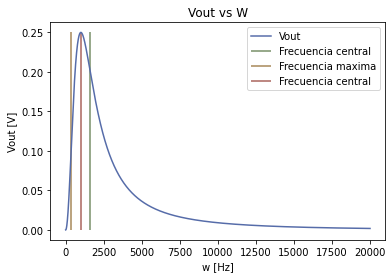

In [64]:
plt.plot(x,f, '#566ca9', label='Vout')
plt.title('Vout vs W')
plt.ylabel('Vout [V]')
plt.xlabel('w [Hz]')
plt.vlines(x[posm],0,0.25,'#778f66',label='Frecuencia central')
plt.vlines(x[posM],0,0.25,'#a78756',label='Frecuencia maxima')
plt.vlines(x[posC],0,0.25,'#a9625b',label='Frecuencia central')
plt.legend()
plt.savefig('../Images/Vout')